In [1]:
# import pandas as pd
# import numpy as np

# # Load the original CSV files
# tl_data = pd.read_csv('translation_data/train-TL.csv')
# zh_data = pd.read_csv('translation_data/train-ZH.csv')

# # Set a random seed for reproducibility
# np.random.seed(42)

# # Get the total number of samples
# total_samples = len(tl_data)

# # Choose 1/10 of the indices randomly
# small_indices = np.random.choice(total_samples, size=total_samples // 100, replace=False)

# # Create small datasets using the chosen indices
# tl_data_small = tl_data.iloc[small_indices]
# zh_data_small = zh_data.iloc[small_indices]

# # Save the downsampled data to new CSV files
# tl_data_small.to_csv('train-TL_small.csv', index=False)
# zh_data_small.to_csv('train-ZH_small.csv', index=False)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import required libraries
import numpy as np
import pandas as pd  # use this to read .csv

import matplotlib.pyplot as plt
import torch
# from torch.nn import TransformerEncoder, TransformerEncoderLayer
from sklearn.model_selection import train_test_split

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [5]:
!pip install pandas


In [6]:
#import data from local
# ZH_data = pd.read_csv('train-ZH_pinyen.csv')
# TL_data = pd.read_csv('translation_data/train-TL.csv')
ZH_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/廖元甫作業/作業3/train-ZH-new.csv')
TL_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/廖元甫作業/作業3/translation_data/train-TL.csv')
print(ZH_data.head(5))  # use .head() to show first five data

print("-"*40)

# Add preprocessing to remove specific punctuation symbols
def preprocess_text(text):
  punctuation_symbols = ["，", "。", "、"]
  for symbol in punctuation_symbols:
    text = text.replace(symbol, "")
  return text.replace(" ", "")
ZH_data['txt'] = ZH_data['txt'].apply(preprocess_text)
TL_data['txt'] = TL_data['txt'].apply(preprocess_text)

print(TL_data.head(5))

   id                                                txt
0   1  Obama-da-sheng--mei-guo--tou-yi-wei--wu-ren--z...
1   2  zhu-mei--te-pai-yuan--cao-yu-fen--hua-fu--bao-dao
2   3  Obama-da-sheng--mei-guo--tou-yi-wei--wu-ren--z...
3   4      ya-dao-xing--sheng-li--chuang-zao--xin-li-shi
4   5  min-zhu-dang--zong-tong--hou-xuan-ren-Obama-si...
----------------------------------------
   id                                                txt
0   1  Obamatua7-sing3bi2-kok4thau5-tsit8-ui7oo1-lang...
1   2  tsu3-bi2tik8-phai3-uan5tso5-hiok4-hun1hua5-hu2...
2   3  Obamatua7-sing3bi2-kok4thau5-tsit8-ui7oo1-lang...
3   4    ap4-to2-sing3sing3-li7tshong3-tso7sin1-lik8-su2
4   5  bin5-tsu2-tong2tsong2-thong2hau7-suan2-jin5Oba...


In [7]:
if(ZH_data.shape == TL_data.shape):
    print(TL_data.shape)

(63469, 2)


In [8]:
# combine data
combined_data = pd.merge(ZH_data, TL_data, on='id')
#print(combined_data.head(5).T)

# train_test split
train_data, valid_data = train_test_split(combined_data, test_size=0.2, random_state=42, shuffle=True)

X_train = train_data['txt_x'].values
Y_train = train_data['txt_y'].values

X_valid = valid_data['txt_x'].values
Y_valid = valid_data['txt_y'].values
print(X_train[0])
print(X_train[2])
print(Y_train[0])
print(combined_data.head(5).T)


xian-fa--bao-zhang--ren-min-de--yan-lun-zi-you--he--xing-dong-quan-li-
mian-fei--yu--jiao-ji-de--min-zhong--guan-shang-
hian3-huat4po2-tsiong3jin5-bin5-e5gian5-lun7-tsu7-iu5ham5hing5-tong7-kuan5-li7
                                                       0  \
id                                                     1   
txt_x  Obama-da-sheng--mei-guo--tou-yi-wei--wu-ren--z...   
txt_y  Obamatua7-sing3bi2-kok4thau5-tsit8-ui7oo1-lang...   

                                                       1  \
id                                                     2   
txt_x  zhu-mei--te-pai-yuan--cao-yu-fen--hua-fu--bao-dao   
txt_y  tsu3-bi2tik8-phai3-uan5tso5-hiok4-hun1hua5-hu2...   

                                                       2  \
id                                                     3   
txt_x  Obama-da-sheng--mei-guo--tou-yi-wei--wu-ren--z...   
txt_y  Obamatua7-sing3bi2-kok4thau5-tsit8-ui7oo1-lang...   

                                                     3  \
id                  

In [9]:
import tensorflow as tf
from keras.preprocessing import text
from keras.preprocessing import sequence
from transformers import TFAutoModel, AutoTokenizer

In [10]:

# Load the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-large-uncased')
X_token = tokenizer
Y_token = tokenizer
# max_len = 24
max_len = 30

xtrain_seq = [tokenizer.encode(text, max_length=max_len, truncation=True, padding='max_length', return_tensors='np')[0] for text in X_train]
xvalid_seq = [tokenizer.encode(text, max_length=max_len, truncation=True, padding='max_length', return_tensors='np')[0] for text in X_valid]

#zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)     #zero-padding: ensures that all sequences have the same length
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)
print("xtrain_pad0= ", xtrain_pad[0])
print("xtrain_pad2= ", xtrain_pad[2])

ytrain_seq = [tokenizer.encode(text, max_length=max_len, truncation=True, padding='max_length', return_tensors='np')[0] for text in Y_train]
yvalid_seq = [tokenizer.encode(text, max_length=max_len, truncation=True, padding='max_length', return_tensors='np')[0] for text in Y_valid]

#zero pad the sequences
ytrain_pad = sequence.pad_sequences(ytrain_seq, maxlen=max_len)     #zero-padding: ensures that all sequences have the same length
yvalid_pad = sequence.pad_sequences(yvalid_seq, maxlen=max_len)
print("ytrain_pad= ", ytrain_pad[0])


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

xtrain_pad0=  [  101  8418  2319  1011  6904  1011  1011 25945  1011  9327  1011  1011
 14916  1011  8117  1011  2139  1011  1011 13619  1011 11320  2078  1011
  1062  2072  1011  2017  1011   102]
xtrain_pad2=  [  101  8764  2078  1011 24664  1011  1011  9805  1011  1011 25871  2080
  1011 10147  1011  2139  1011  1011  8117  1011  1062 19991  1011  1011
 19739  2319  1011 29382  1011   102]
ytrain_pad=  [  101  7632  2319  2509  1011 23064  2102  2549  6873  2475  1011 24529
  3258  2290  2509 14642  2629  1011  8026  2629  1011  1041  2629 10440
  2078  2629  1011 11320  2078   102]


In [11]:
num_epochs = 15
batch_size = 128
num_batches = len(xtrain_pad) // batch_size
embedding_dim = 100
learning_rate = 0.005

#### Use Transformer method

In [12]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Attention, Lambda
from tqdm import tqdm
from transformers import TFAutoModel, AutoTokenizer
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

# Load transformer model and tokenizer
#transformer_model = TFAutoModel.from_pretrained('bert-base-uncased', vocab_size=30522)
transformer_model = TFAutoModel.from_pretrained('bert-large-uncased')           # include self-attension
tokenizer = AutoTokenizer.from_pretrained('bert-large-uncased')

# Define the input layers
encoder_input = Input(shape=(max_len,), dtype=tf.int32)
decoder_input = Input(shape=(max_len-1,), dtype=tf.int32)

# Tokenize and get embeddings
encoder_embedding = Lambda(lambda x: transformer_model(x)[0])(encoder_input)
decoder_embedding = Lambda(lambda x: transformer_model(x)[0])(decoder_input)


# Output layer
decoder_output = Dense(tokenizer.vocab_size, activation='softmax')(decoder_embedding)

# Combine the encoder and decoder into a single model
# This model is a transformer model
model = Model(inputs=[encoder_input, decoder_input], outputs=decoder_output)

for layer in model.layers:
    layer.trainable = True

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def lr_schedule(epoch):
    return learning_rate * np.power(0.9, epoch)

# Add a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Print the model summary
model.summary()

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 29)]                 0         []                            
                                                                                                  
 lambda_1 (Lambda)           (None, 29, 1024)             0         ['input_2[0][0]']             
                                                                                                  
 input_1 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 29, 30522)            3128505   ['lambda_1[0][0]']            
                                                          0                                   

#### Train model

In [13]:
# Lists to store metrics for each epoch
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

best_valid_accuracy = 0.0
best_weights = None

################################################################################
# # Specify the path to the pre-trained weights file
# pretrained_weights_path = 'weights_epoch_{epoch + 1}.h5'

# # Load pre-trained weights into the model
# model.load_weights(pretrained_weights_path)

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}:")

    # Lists to store metrics for each batch
    train_batch_losses = []
    train_batch_accuracies = []

    for batch in tqdm(range(num_batches)):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size

        train_loss, train_accuracy = model.train_on_batch(
                    [xtrain_pad[start_idx:end_idx], ytrain_pad[start_idx:end_idx, :-1]],
                    ytrain_pad[start_idx:end_idx, 1:])

        # Append metrics to the lists
        train_batch_losses.append(train_loss)
        train_batch_accuracies.append(train_accuracy)

    # Calculate and print average metrics for the epoch
    avg_train_loss = np.mean(train_batch_losses)
    avg_train_accuracy = np.mean(train_batch_accuracies)
    print(f"Train Loss: {avg_train_loss:.4f} - Train Accuracy: {avg_train_accuracy:.4f}")

    # Append metrics to the epoch lists
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Evaluate the model on the validation set after each epoch
    valid_loss, valid_accuracy = model.evaluate(
        x=[xvalid_pad, yvalid_pad[:, :-1]],
        y=yvalid_pad[:, 1:],
        verbose=0
    )
    print(f"Validation Loss: {valid_loss:.4f} - Validation Accuracy: {valid_accuracy:.4f}")

    # Append metrics to the validation lists
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_accuracy)

    # Check if the current model has the best validation accuracy
    if valid_accuracy > best_valid_accuracy:
        best_valid_accuracy = valid_accuracy
        best_weights = model.get_weights()

    # Save the weights after each epoch
    model.save_weights('weights_epoch_{epoch + 1}.h5')

# Set the model weights to the best weights
model.set_weights(best_weights)

# Print the best validation accuracy
print(f"Best Validation Accuracy: {best_valid_accuracy:.4f}")


Epoch 1/15:


100%|██████████| 396/396 [07:20<00:00,  1.11s/it]


Train Loss: 1.7060 - Train Accuracy: 0.6340
Validation Loss: 0.9905 - Validation Accuracy: 0.7905

Epoch 2/15:


100%|██████████| 396/396 [07:09<00:00,  1.08s/it]


Train Loss: 1.2819 - Train Accuracy: 0.7047
Validation Loss: 0.8586 - Validation Accuracy: 0.8148

Epoch 3/15:


100%|██████████| 396/396 [07:05<00:00,  1.07s/it]


Train Loss: 1.2167 - Train Accuracy: 0.7167
Validation Loss: 0.8108 - Validation Accuracy: 0.8262

Epoch 4/15:


100%|██████████| 396/396 [07:03<00:00,  1.07s/it]


Train Loss: 1.1895 - Train Accuracy: 0.7217
Validation Loss: 0.7850 - Validation Accuracy: 0.8286

Epoch 5/15:


100%|██████████| 396/396 [07:04<00:00,  1.07s/it]


Train Loss: 1.1758 - Train Accuracy: 0.7237
Validation Loss: 0.7654 - Validation Accuracy: 0.8302

Epoch 6/15:


100%|██████████| 396/396 [07:00<00:00,  1.06s/it]


Train Loss: 1.1693 - Train Accuracy: 0.7248
Validation Loss: 0.7545 - Validation Accuracy: 0.8342

Epoch 7/15:


100%|██████████| 396/396 [07:00<00:00,  1.06s/it]


Train Loss: 1.1638 - Train Accuracy: 0.7262
Validation Loss: 0.7469 - Validation Accuracy: 0.8350

Epoch 8/15:


100%|██████████| 396/396 [07:04<00:00,  1.07s/it]


Train Loss: 1.1600 - Train Accuracy: 0.7271
Validation Loss: 0.7438 - Validation Accuracy: 0.8351

Epoch 9/15:


100%|██████████| 396/396 [06:58<00:00,  1.06s/it]


Train Loss: 1.1565 - Train Accuracy: 0.7282
Validation Loss: 0.7303 - Validation Accuracy: 0.8382

Epoch 10/15:


100%|██████████| 396/396 [07:00<00:00,  1.06s/it]


Train Loss: 1.1550 - Train Accuracy: 0.7285
Validation Loss: 0.7352 - Validation Accuracy: 0.8378

Epoch 11/15:


100%|██████████| 396/396 [07:01<00:00,  1.06s/it]


Train Loss: 1.1504 - Train Accuracy: 0.7297
Validation Loss: 0.7302 - Validation Accuracy: 0.8355

Epoch 12/15:


100%|██████████| 396/396 [07:01<00:00,  1.07s/it]


Train Loss: 1.1511 - Train Accuracy: 0.7292
Validation Loss: 0.7269 - Validation Accuracy: 0.8388

Epoch 13/15:


100%|██████████| 396/396 [07:01<00:00,  1.06s/it]


Train Loss: 1.1511 - Train Accuracy: 0.7292
Validation Loss: 0.7230 - Validation Accuracy: 0.8416

Epoch 14/15:


100%|██████████| 396/396 [07:03<00:00,  1.07s/it]


Train Loss: 1.1504 - Train Accuracy: 0.7295
Validation Loss: 0.7296 - Validation Accuracy: 0.8361

Epoch 15/15:


100%|██████████| 396/396 [07:02<00:00,  1.07s/it]


Train Loss: 1.1470 - Train Accuracy: 0.7302
Validation Loss: 0.7288 - Validation Accuracy: 0.8405
Best Validation Accuracy: 0.8416


#### test prediction

In [14]:
# Tokenize the test data
# test_data = pd.read_csv('translation_data/test-ZH-nospace.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/廖元甫作業/作業3/translation_data/test-ZH-new.csv')

# Add preprocessing to remove specific punctuation symbols
test_data['txt'] = test_data['txt'].apply(preprocess_text)

# Convert the text to sequences using the BERT tokenizer
test_seq = tokenizer(test_data['txt'].tolist(), padding=True, truncation=True, max_length=max_len, return_tensors='np')
print("")

# Initialize the decoder input with the actual input sequence of the test data
decoder_input_data = test_seq['input_ids'][:, :-1].copy()
print("decoder_input_data=" + str(decoder_input_data))  # Fix the concatenation here


# Generate predictions for each step in the sequence
for i in range(max_len - 1):
    predictions = model.predict([test_seq['input_ids'], decoder_input_data])

    # Get the predicted index for the current step
    predicted_index = np.argmax(predictions[:, i, :], axis=-1)

    # Update the decoder input with the predicted index
    if i + 1 < max_len - 1:  # Check if the index is within bounds
        decoder_input_data[:, i+1] = predicted_index

print("decoder input data =" + str(decoder_input_data))  # Fix the concatenation here

# Decode the predicted indices back to text using the same tokenizer
predicted_texts = []
for indices in decoder_input_data:
    indices = indices[indices != 0]
    text = tokenizer.decode(indices.tolist(), skip_special_tokens=True)
    predicted_texts.append(text)

output_df = pd.DataFrame({'id': test_data['id'], 'txt': predicted_texts})

# Save the output to a CSV file
output_df.to_csv('predictions.csv', index=False)



decoder_input_data=[[  101 16950  2080 ... 11237  1011  4830]
 [  101 20985  1011 ...  4241  1011   102]
 [  101 16950  2072 ...     0     0     0]
 ...
 [  101  1062  4048 ...     0     0     0]
 [  101 12316  1011 ...  2080  1011   102]
 [  101  8814  1011 ...     0     0     0]]
21/21 [==============================] - 5s 229ms/step
decoder input data =[[  101 24529  2080 ...     0     0     0]
 [  101 24529 14691 ...     0     0     0]
 [  101 24529  2072 ...     0     0     0]
 ...
 [  101  1639  4048 ...     0     0     0]
 [  101 24529 14691 ...     0     0     0]
 [  101  1641 14736 ...     0     0     0]]


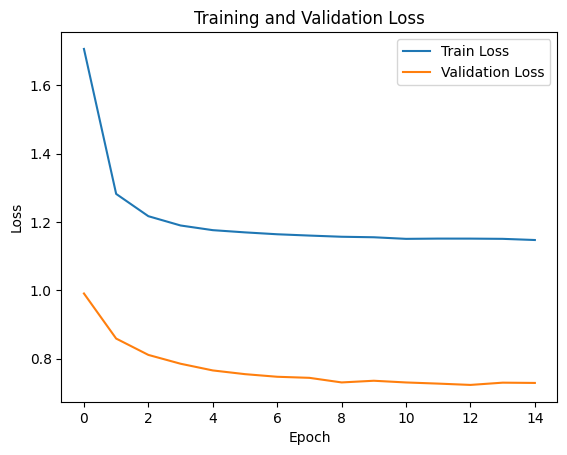

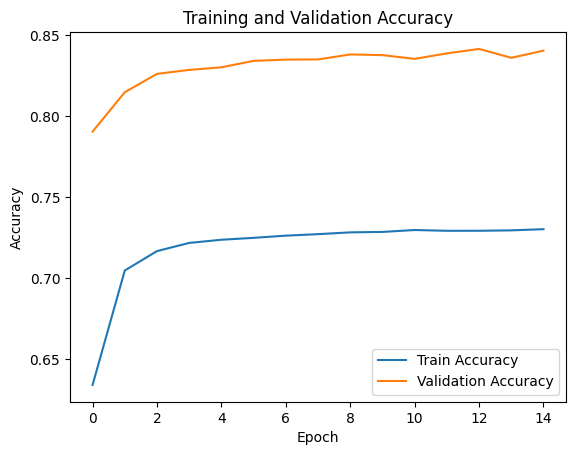

In [15]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()